# Employee Performance and Retention Analysis
**Author:** Vyomkesh Vyas  
**Date Created:** 16th July 2025

This project aims to develop an Employee Performance and Retention Analysis using a real-world dataset. The goal is to apply concepts from probability, statistics, machine learning, and deep learning to analyze employee data and predict performance and retention trends.  

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Preprocessing

In [2]:
# Loading dataset
employee_df = pd.read_csv('data/Employee_data.csv')
employee_df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [3]:
# Displaying basic information about the dataset
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


### Exploratory Data Analysis (EDA)

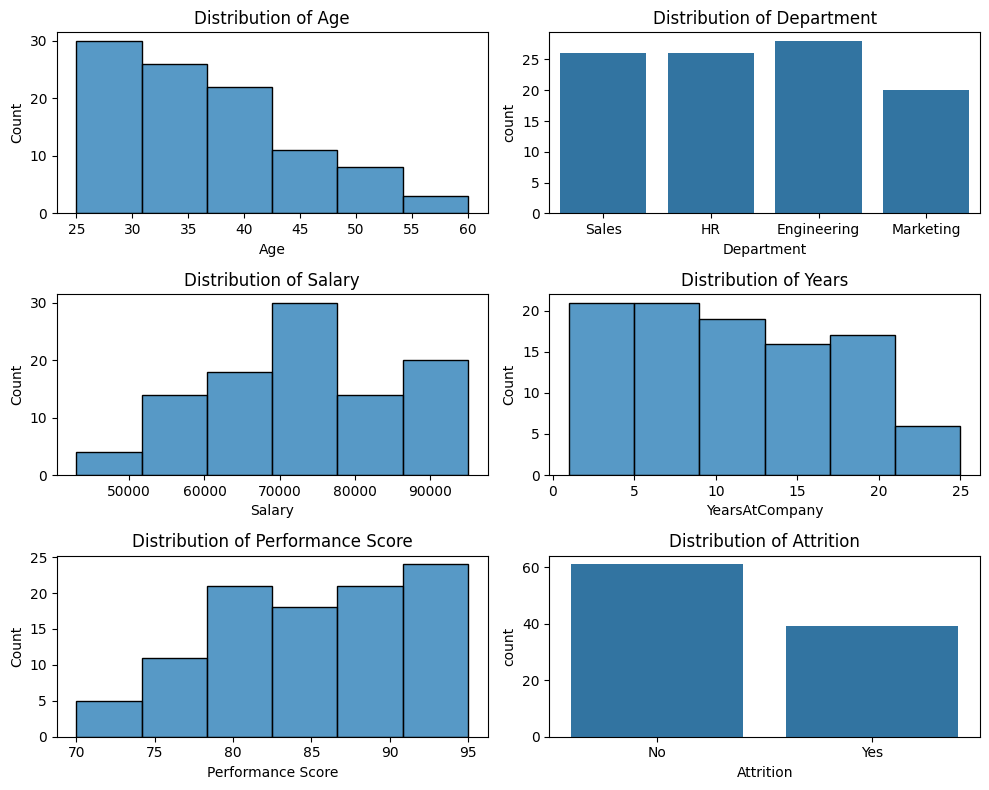

In [4]:
# Plotting distribution of data
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.histplot(data=employee_df, x="Age", bins=6)
plt.title("Distribution of Age")
plt.xlabel("Age")

plt.subplot(3,2,2)
sns.countplot(data=employee_df, x="Department")
plt.title("Distribution of Department")
plt.xlabel("Department")

plt.subplot(3,2,3)
sns.histplot(data=employee_df, x="Salary", bins=6)
plt.title("Distribution of Salary")
plt.xlabel("Salary")

plt.subplot(3,2,4)
sns.histplot(data=employee_df, x="YearsAtCompany", bins=6)
plt.title("Distribution of Years")
plt.xlabel("YearsAtCompany")

plt.subplot(3,2,5)
sns.histplot(data=employee_df, x="PerformanceScore", bins=6)
plt.title("Distribution of Performance Score")
plt.xlabel("Performance Score")

plt.subplot(3,2,6)
sns.countplot(data=employee_df, x="Attrition")
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")

plt.tight_layout()
plt.show()    

In [29]:
# Displaying descriptive stats of numeric columns
num_cols = employee_df.iloc[:,1:].select_dtypes(include="number").columns.to_list()
desc_stats = pd.DataFrame(index=num_cols,columns=["Mean", "Mode", "Median", "Variance", "Standard Deviation"])

for i in num_cols:
    desc_stats.loc[i,"Mean"] = employee_df[i].mean().round(2)
    desc_stats.loc[i,"Mode"] = employee_df[i].mode()[0]
    desc_stats.loc[i,"Median"] = employee_df[i].median().round(2)
    desc_stats.loc[i,"Variance"] = employee_df[i].var().round(2)
    desc_stats.loc[i,"Standard Deviation"] = employee_df[i].std().round(2)

print("Descriptive Statistics:\n")
desc_stats

Descriptive Statistics:



,Mean,Mode,Median,Variance,Standard Deviation
Age,36.57,29,35.0,69.2,8.32
Salary,72820.0,68000,72000.0,159866262.63,12643.82
YearsAtCompany,10.8,2,10.0,40.46,6.36
PerformanceScore,84.94,80,85.5,40.32,6.35
Attrition,0.39,0,0.0,0.24,0.49


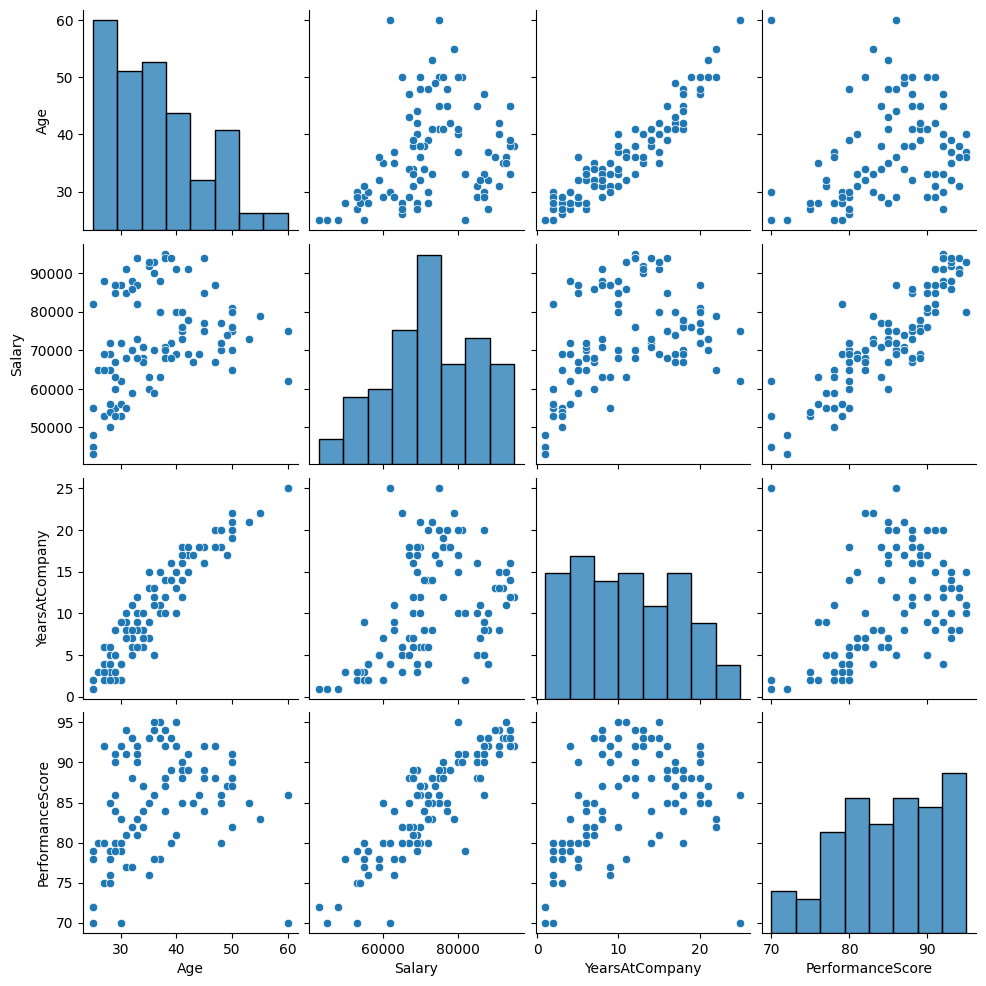

In [6]:
# Pairwise distribution of data
sns.pairplot(data=employee_df[num_cols])

<Axes: >

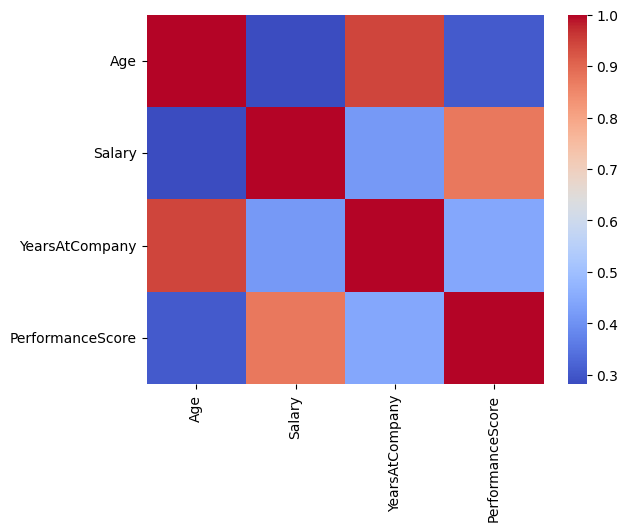

In [7]:
# Displaying correlation matrix
sns.heatmap(employee_df[num_cols].corr(),cmap="coolwarm")

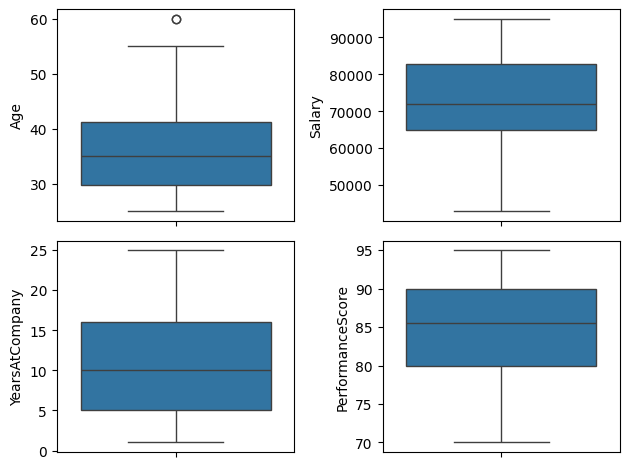

In [8]:
# Checking for outliers
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=employee_df, y=num_cols[i])
plt.tight_layout()
plt.show()


### Probability and Statistical Analysis

In [9]:
# Converting attrition column to numeric
employee_df["Attrition"] = employee_df["Attrition"].map({"Yes":1,"No":0})

# Converting performance score into intervals
bins = [69, 75, 80, 85, 90, 95]
labels = ["70-75", "76-80", "81-85", "86-90", "91-95"]
employee_df["Performance_Interval"] = pd.cut(employee_df["PerformanceScore"], bins= bins, labels=labels)

# Probability of Attrition by Performance Score
print("Probability of Attriton by Performance Score: \n")
print(employee_df.groupby("Performance_Interval")["Attrition"].sum()/len(employee_df))

# Probability of Attrition by Department
print("\nProbability of Attrition by Department: \n")
print(employee_df.groupby(["Department"])["Attrition"].sum()/len(employee_df))

Probability of Attriton by Performance Score: 

Performance_Interval
70-75    0.02
76-80    0.06
81-85    0.08
86-90    0.11
91-95    0.12
Name: Attrition, dtype: float64

Probability of Attrition by Department: 

Department
Engineering    0.12
HR             0.09
Marketing      0.04
Sales          0.14
Name: Attrition, dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_26324\1259489431.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(employee_df.groupby("Performance_Interval")["Attrition"].sum()/len(employee_df))


In [10]:
# Applying Bayes theorem to find the probability of employee attrition given performance score
scores = employee_df["Performance_Interval"].unique()
bayes_df = pd.DataFrame({"P(Attrition)":[0]*len(scores), "P(Score)":[0]*len(scores), 
                         "P(Score|Attrition)":[0]*len(scores), "P(Attrition|Score)":[0]*len(scores),
                         "Scores":scores})
bayes_df.set_index("Scores",inplace=True)

# P(Attrition)
p_attrition = (employee_df['Attrition'] == 1).mean()
bayes_df["P(Attrition)"] = p_attrition

for i in scores:
    # P(Score)
    p_score = (employee_df["Performance_Interval"] == i).mean()
    bayes_df.loc[i,"P(Score)"] = p_score

    # P(Score | Attrition)
    p_score_given_attrition = employee_df[employee_df['Attrition'] == 1]["Performance_Interval"].value_counts(normalize=True).get(i, 0)
    bayes_df.loc[i, "P(Score|Attrition)"] = p_score_given_attrition

    # Bayes’ Theorem
    p_attrition_given_score = (p_score_given_attrition * p_attrition) / p_score
    bayes_df.loc[i, "P(Attrition|Score)"] = p_attrition_given_score

bayes_df


C:\Users\asus\AppData\Local\Temp\ipykernel_26324\2007190141.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.23' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bayes_df.loc[i,"P(Score)"] = p_score
C:\Users\asus\AppData\Local\Temp\ipykernel_26324\2007190141.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15384615384615385' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bayes_df.loc[i, "P(Score|Attrition)"] = p_score_given_attrition
C:\Users\asus\AppData\Local\Temp\ipykernel_26324\2007190141.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2608695652173913' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

,P(Attrition),P(Score),P(Score|Attrition),P(Attrition|Score)
Scores,,,,
76-80,0.39,0.23,0.153846,0.260870
81-85,0.39,0.20,0.205128,0.400000
91-95,0.39,0.24,0.307692,0.500000
86-90,0.39,0.26,0.282051,0.423077
70-75,0.39,0.07,0.051282,0.285714


In [11]:
# Test whether mean performance score differs across departments
from scipy.stats import f_oneway

# Group the performance scores across department
groups = employee_df.groupby("Department")["PerformanceScore"].apply(list)

# Perform one way anova
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Mean performance scores differ across departments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean performance scores.")

F-statistic: 25.7811
P-value: 0.0000
Reject the null hypothesis: Mean performance scores differ across departments.


| Step        | Description                          |
| ----------- | ------------------------------------ |
| Test Used   | One-Way ANOVA (`f_oneway`)           |
| Null Hyp.   | All departments have same mean score |
| Alt. Hyp.   | At least one department differs      |
| P-value     | < 0.05 means reject H₀               |
| Assumptions | Normality, Homogeneity of variances  |

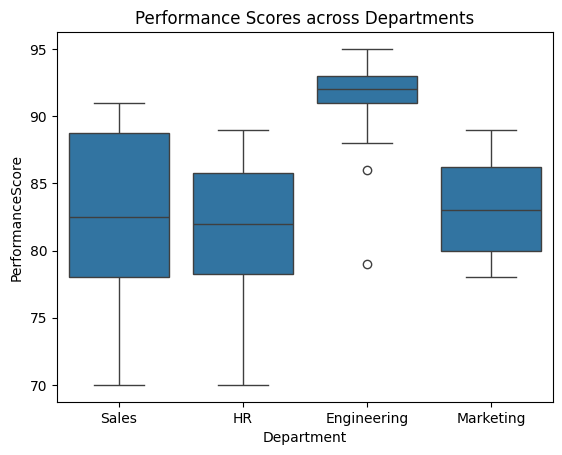

In [419]:
# Visualize with boxplot
sns.boxplot(data=employee_df, x="Department", y="PerformanceScore")
plt.title("Performance Scores across Departments")
plt.xlabel("Department")
plt.ylabel("PerformanceScore")
plt.show()

### Feature Engineering and Encoding

In [420]:
# Performing feature engineering and encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Scaling numerical columns
ss = StandardScaler()
employee_df_t = employee_df.copy()
employee_df_t[num_cols] = ss.fit_transform(employee_df_t[num_cols])
employee_df_t.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Performance_Interval
0,1,John Doe,-0.914607,Sales,-1.416484,-1.232364,-0.781900,0,76-80
1,2,Jane Smith,-0.189687,HR,-1.019042,-0.600383,0.009497,0,81-85
2,3,Michael Brown,0.414412,Engineering,0.570727,-0.126396,1.592290,1,91-95
3,4,Emily Davis,-1.035427,Marketing,-0.621600,-0.916373,-1.098459,0,76-80
4,5,David Johnson,1.622612,Sales,0.173285,1.453558,0.484335,1,86-90


In [421]:
# Encoding categorical column
le = LabelEncoder()
employee_df_t["Department"] = le.fit_transform(employee_df_t["Department"])
employee_df_t.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Performance_Interval
0,1,John Doe,-0.914607,3,-1.416484,-1.232364,-0.781900,0,76-80
1,2,Jane Smith,-0.189687,1,-1.019042,-0.600383,0.009497,0,81-85
2,3,Michael Brown,0.414412,0,0.570727,-0.126396,1.592290,1,91-95
3,4,Emily Davis,-1.035427,2,-0.621600,-0.916373,-1.098459,0,76-80
4,5,David Johnson,1.622612,3,0.173285,1.453558,0.484335,1,86-90


### Employee Attrition Prediction Model

In [422]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split

X = employee_df_t[["Age", "Department", "Salary", "YearsAtCompany", "PerformanceScore"]]
y = employee_df_t["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Shape of X:", X_train.shape, X_test.shape)
print("Shape of y:", y_train.shape, y_test.shape)

Shape of X: (70, 5) (30, 5)
Shape of y: (70,) (30,)


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77        17
           1       0.75      0.46      0.57        13

    accuracy                           0.70        30
   macro avg       0.72      0.67      0.67        30
weighted avg       0.71      0.70      0.68        30

Confusion Matrix:



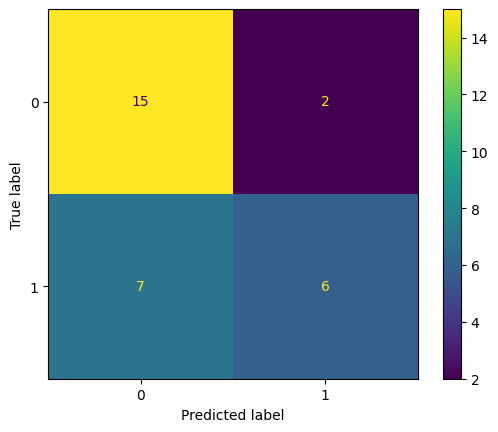

In [423]:
# Training and evaluating employee attrition model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Printing classification report
print("Classification Report:\n",classification_report(y_test, y_pred) )

# Visualising confusion matrix
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

### Employee Performance Prediction Model

In [424]:
# Splitting data into train and test set
X = employee_df_t[["Age", "Department", "Salary", "YearsAtCompany"]]
y = employee_df["PerformanceScore"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Shape of X:", X_train.shape, X_test.shape)
print("Shape of y:", y_train.shape, y_test.shape)

Shape of X: (70, 4) (30, 4)
Shape of y: (70,) (30,)


In [425]:
# Training and evaluating employee performance model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.563885542652557
R2 Score: 0.7887510631997734


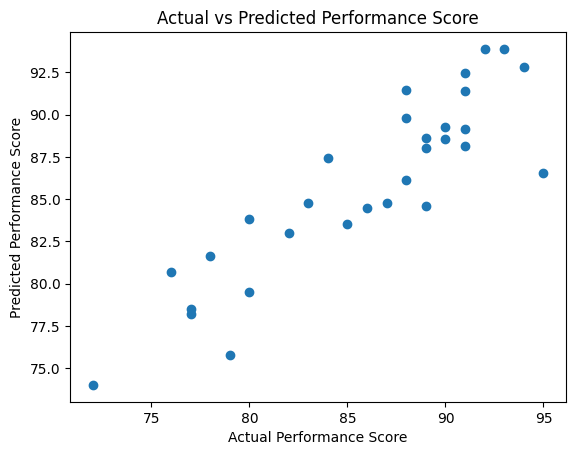

In [426]:
# Visualising actual vs predicted performance score
plt.scatter(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Performance Score")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.show()

### Deep Learning for Employee Performance Prediction

In [427]:
# 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Splitting data into train and test set
X = employee_df_t[["Age", "Department", "Salary", "YearsAtCompany"]]
y = employee_df["PerformanceScore"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Setting random seed
tf.random.set_seed(42)

# Building model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1) # Output layer (regression)
])

# Compiling model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

# Showing model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                320       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [428]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=16,
    verbose=1
)

Epoch 1/500
4/4 [==============================] - 0s 35ms/step - loss: 7081.9399 - mae: 83.9051 - val_loss: 7733.8975 - val_mae: 87.7908
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 7043.6792 - mae: 83.6729 - val_loss: 7704.3843 - val_mae: 87.6195
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 7007.2275 - mae: 83.4497 - val_loss: 7676.5537 - val_mae: 87.4572
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 6971.7456 - mae: 83.2318 - val_loss: 7649.8057 - val_mae: 87.3010
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 6936.4229 - mae: 83.0140 - val_loss: 7623.1274 - val_mae: 87.1448
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 6900.2627 - mae: 82.7903 - val_loss: 7596.5127 - val_mae: 86.9885
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 6865.8687 - mae: 82.5781 - val_loss: 7569.8550 - val_mae: 86.8316
Epoch 8/500
4/4 [======================

In [429]:
# Evaluate on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss:.4f}, MAE: {mae:.4f}")

1/1 [==============================] - 0s 20ms/step - loss: 13.1932 - mae: 2.9798
Test MSE: 13.1932, MAE: 2.9798


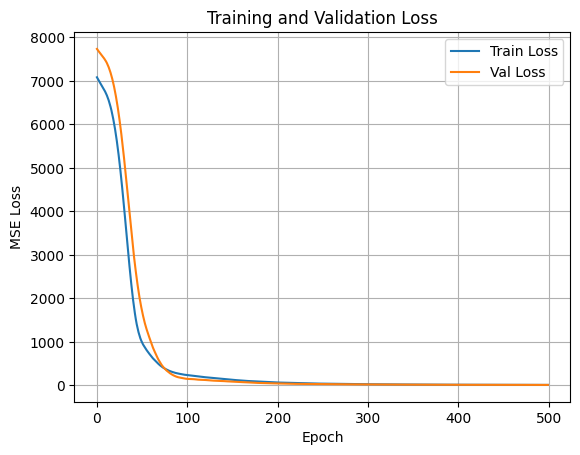

In [430]:
# Visualise training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 35ms/step


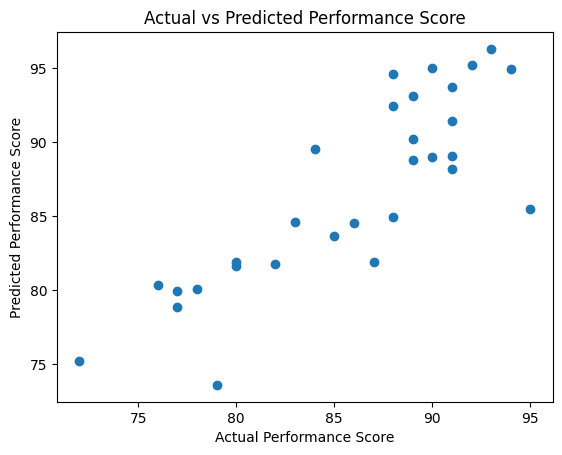

In [431]:
# Plotting Actual vs Predicted Performance Score
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Performance Score")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.show()

### Employee Attrition Analysis with Deep Learning

In [432]:
# Splitting into train and test set
X = employee_df_t[["Age", "Department", "Salary", "YearsAtCompany", "PerformanceScore"]]
y = employee_df_t["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Setting random seed
tf.random.set_seed(42)

# Building model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compiling model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Showing model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                384       
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [433]:
# Training model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=16,
    verbose=1
)

Epoch 1/500
4/4 [==============================] - 0s 33ms/step - loss: 0.7644 - accuracy: 0.4107 - val_loss: 0.6944 - val_accuracy: 0.6429
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7248 - accuracy: 0.4643 - val_loss: 0.6688 - val_accuracy: 0.6429
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6954 - accuracy: 0.5179 - val_loss: 0.6520 - val_accuracy: 0.5714
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6740 - accuracy: 0.6250 - val_loss: 0.6389 - val_accuracy: 0.6429
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.6250 - val_loss: 0.6317 - val_accuracy: 0.6429
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6409 - accuracy: 0.6429 - val_loss: 0.6268 - val_accuracy: 0.6429
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.6786 - val_loss: 0.6226 - val_accuracy: 0.6429
Epoch 8/500
4/4 [=======

1/1 [==============================] - 0s 17ms/step - loss: 1.5032 - accuracy: 0.6333
Test loss: 1.5032, Accuracy: 0.6333
1/1 [==============================] - 0s 38ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.58      0.54      0.56        13

    accuracy                           0.63        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30

Confusion Matrix:



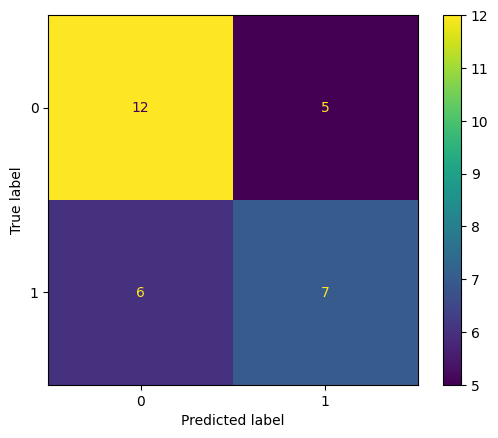

In [434]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Converting probabilities to binary 
y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

# Printing classification report
print("Classification Report:\n",classification_report(y_test, y_pred) )

# Visualising confusion matrix
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

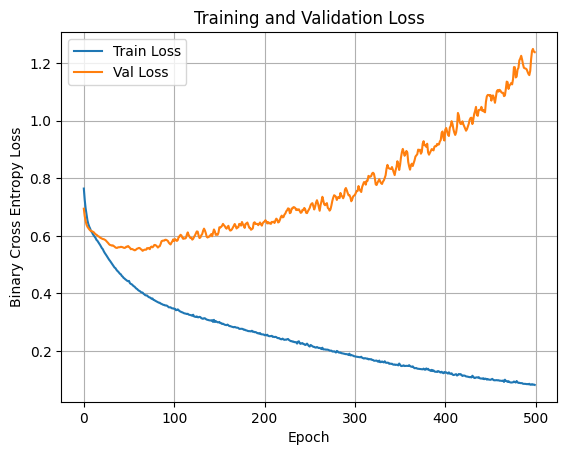

In [435]:
# Visualise training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()

### Insights and Recommendations
Key factors contibuting to Employee performance:  
- **Department:** Engineering department has the highest mean and median performance score while HR department has the lowest.  
- **Salary:** Employee having high salary tends to perform better and vice versa.
- **Years At Company:** Employee with more tenure with the company often performs better.
- **Age:** It shows positive correlation with the performance.  

High Risk groups for Attrition:  
- Employees in Engineering and Sales departments shows higher attrition.  
- High performance scores are assosicaited with higher attrition risk.  
- Attrition is highest in employees with either 2 years of service or 20 years of service.  

Department-Wise Performance Improvement Plans

| Department  | Avg. Score | Strategy                                                |
| ----------- | ---------- | ------------------------------------------------------- |
| HR       | Low        | Mentorship and goal-setting programs                    |
| Marketing          | Medium     | Introduce skill-based training and rotation             |
| Engineering | High       | Incentivize performance through recognition and bonuses |


Targeted Employee Engagement Programs
1. For High-Attrition Groups:
- Launch early-career development tracks for younger employees.
- Provide flexible schedules or hybrid options for low-satisfaction teams.
- Use feedback surveys to identify underlying dissatisfaction drivers.

2. For Low Performance Departments:
- Introduce performance-based bonus incentives.
- Run cross-functional training workshops.
- Encourage peer-learning through team-led hackathons or demo days.

### Data Visualization and Reporting

In [12]:
import plotly.express as px
# Line Plot: Average performance score trend by year
line_data = employee_df.groupby('YearsAtCompany')['PerformanceScore'].mean().reset_index()
line_plot = px.line(line_data, x='YearsAtCompany', y='PerformanceScore',
                    title='Average Performance Score Over Time',
                    markers=True)

# Bar Chart: Attrition count by department
bar_data = employee_df[employee_df['Attrition'] == 1].groupby('Department').size().reset_index(name='Attritions')
bar_plot = px.bar(bar_data, x='Department', y='Attritions',
                  title='Department-wise Attrition Count',
                  color='Attritions')

# Scatter Plot: Salary vs. Performance Score
scatter_plot = px.scatter(employee_df, x='Salary', y='PerformanceScore',
                          color='Department', hover_data=['EmployeeID'],
                          title='Salary vs Performance Score')

line_plot.show()
bar_plot.show()
scatter_plot.show()
